Firstly let's take the dataset, split characteristic and target and divide it in training e test set

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')


# Split characteristic (X) and Target (y)
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
])

y = df[['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
        'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
        'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock']].idxmax(axis=1)


# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrare le dimensioni dei set di addestramento e test
print(f"Dimensioni del training set: {X_train.shape}, {y_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}, {y_test.shape}")

Dimensioni del training set: (36048, 13), (36048,)
Dimensioni del test set: (9013, 13), (9013,)


Let's see the distribution of the training set to evalute possible unbalancing

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples for each genre
class_counts = y_train.value_counts()

# Plot the distribution of samples across genres
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in the Training Set')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


NameError: name 'y_train' is not defined

The training set looks pretty much balanced, so let's go ahead and generate the model. we are gonna use gridsearch in order to find the best parameter for the SVM model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameters to optimize
param_grid = {
    'C': [1, 5, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Instantiate the SVM model
svm = SVC()

# Apply Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


**Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}**


Now let's the confusion matrix in order to try to improve the model

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM with Best Parameters (Grid Search)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'y_pred' is not defined

let's see the feature importance for model decision

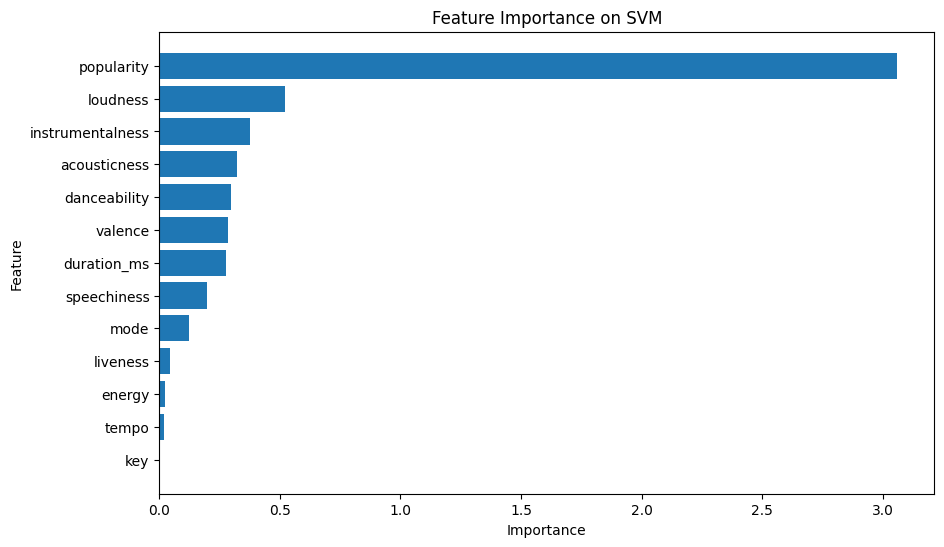

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
svm_model_linear = SVC(kernel='linear', C=10, random_state=42)

# Pipeline: linear SVM
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_model_linear)
])

# Train
pipeline_linear.fit(X_train, y_train)
y_pred_linear = pipeline_linear.predict(X_test)

# Extract feature importances (coefficients) from the linear SVM
feature_importance = np.abs(svm_model_linear.coef_[0])  # Taking absolute value of coefficients
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance on SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


another test we would like to do is finding the feature importance in the decision of every genre. In order to find out we are going to create a model linear svm for each genre and extract the coefficent.

Modello per il genere: music_genre_Anime


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


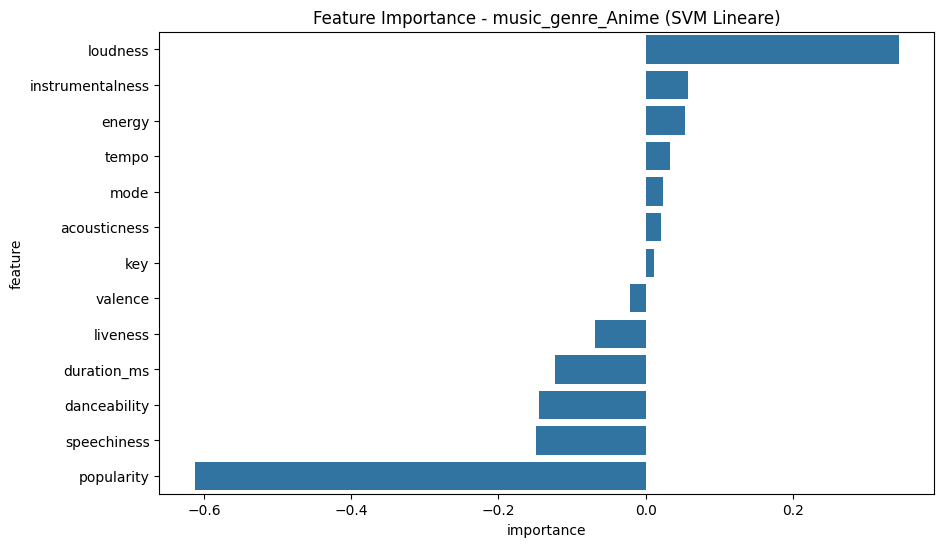

Modello per il genere: music_genre_Blues


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


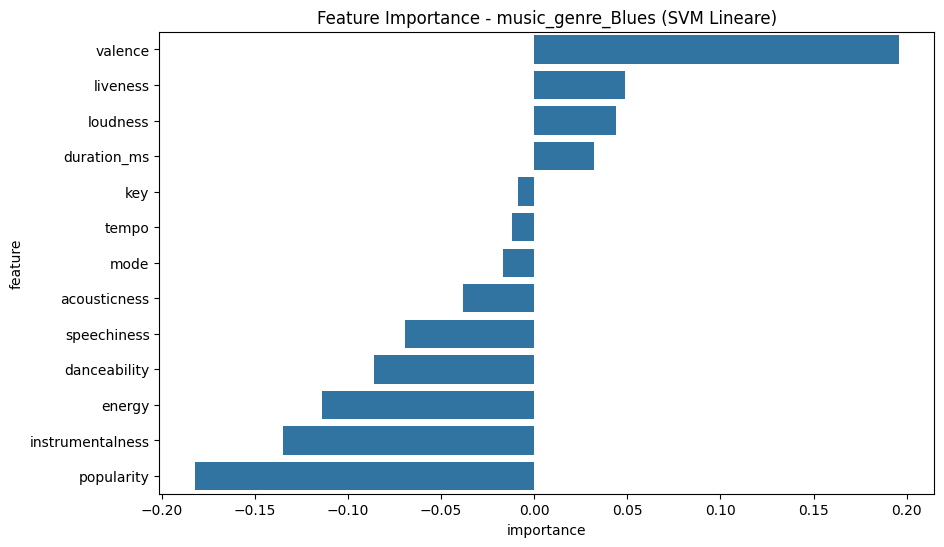

Modello per il genere: music_genre_Classical


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


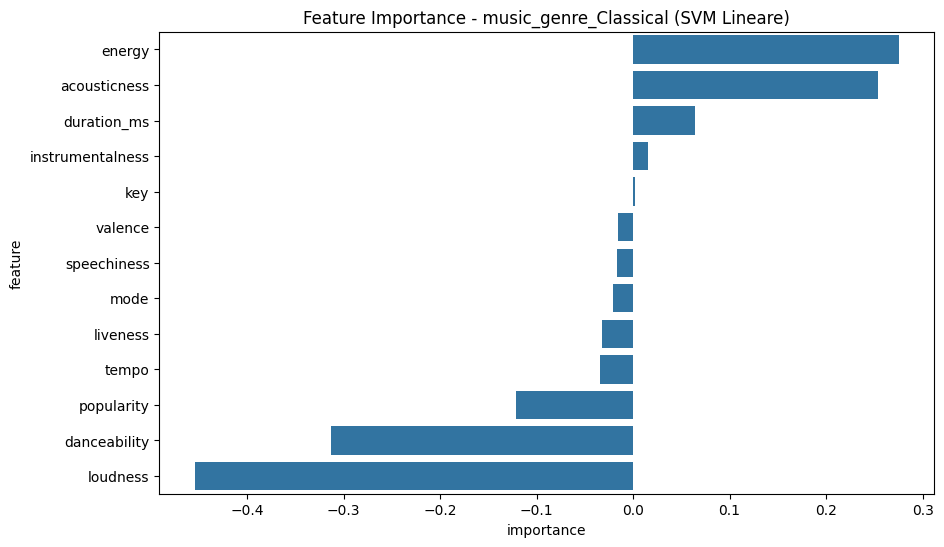

Modello per il genere: music_genre_Country


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


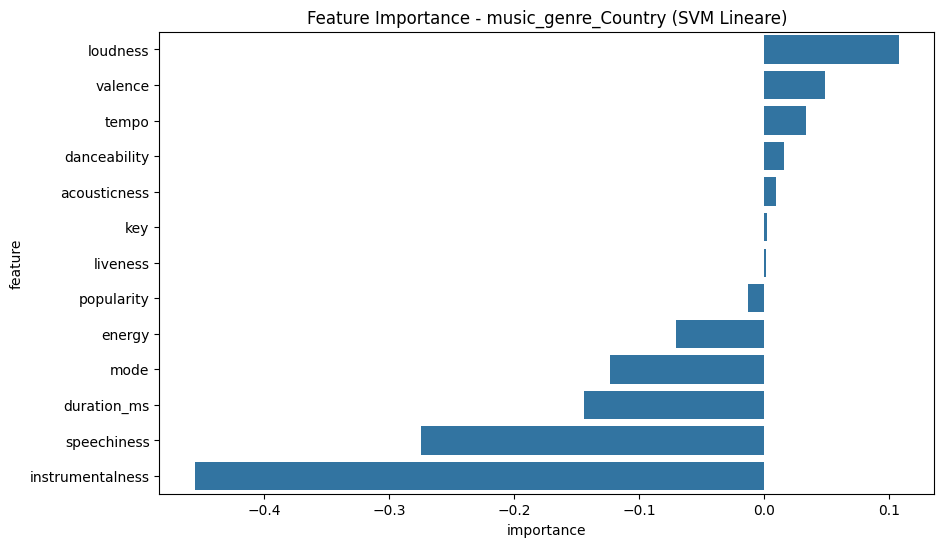

Modello per il genere: music_genre_Electronic


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


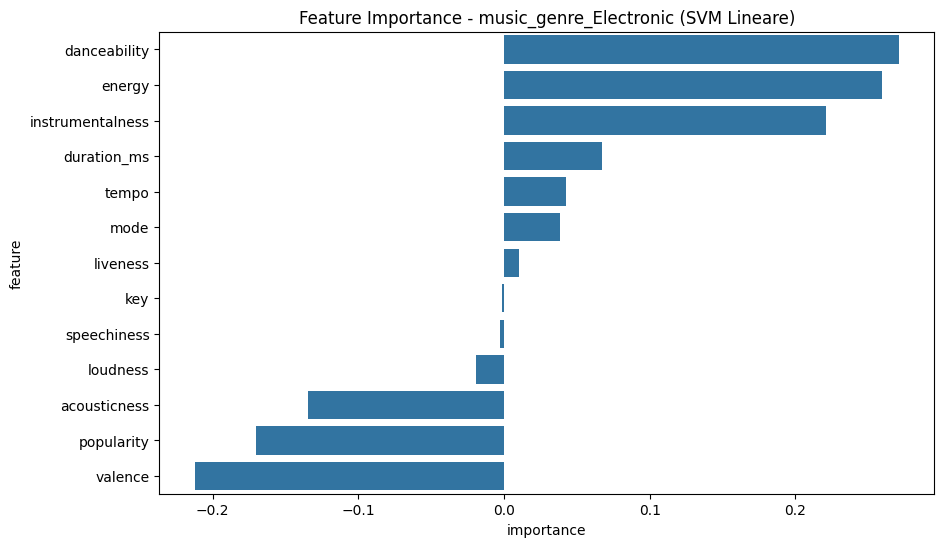

Modello per il genere: music_genre_Hip-Hop


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


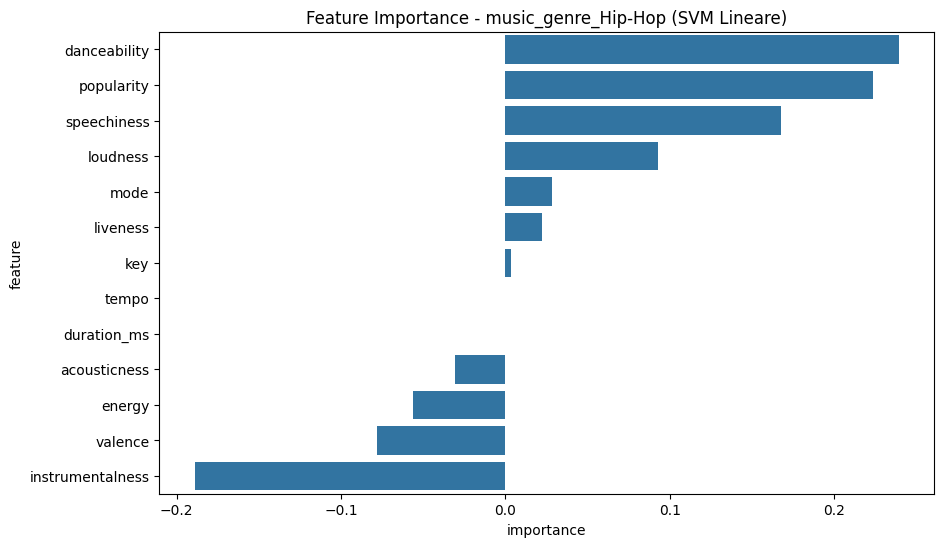

Modello per il genere: music_genre_Jazz


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


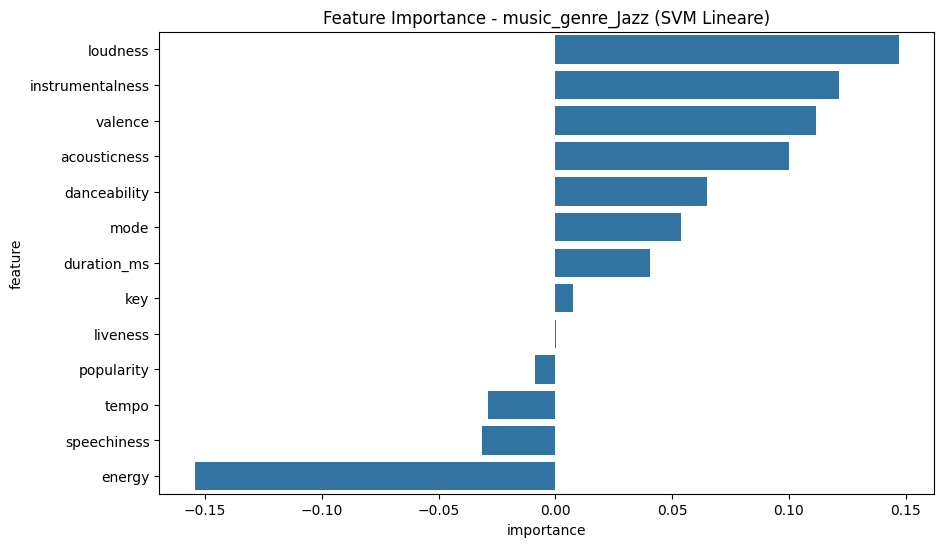

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume we want to create a binary model for each genre
genres = ['music_genre_Anime', 'music_genre_Blues',
          'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
          'music_genre_Hip-Hop', 'music_genre_Jazz']

# Use df_filtered to create both X and y_binary
for genre in genres:
    print(f"Model for genre: {genre}")

    # Create a binary target from the filtered dataframe
    y_binary = df[genre]

    # Split the data into training and test sets
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    pipeline_svm = Pipeline([
        ('scaler', StandardScaler()),  # Standardization of data
        ('svm', LinearSVC(random_state=42, max_iter=10000))  # Linear SVM model
    ])

    # Train the model
    pipeline_svm.fit(X_train_bin, y_train_bin)

    # Extract the coefficients of the linear SVM model
    coefficients = pipeline_svm.named_steps['svm'].coef_.flatten()  # Coefficients for the linear SVM
    feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': coefficients})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title(f'Feature Importance - {genre} (Linear SVM)')
    plt.show()


let's try to improve the accuracy of our model. **In order to improve the model we try 2 possible solution**. The first try will be to group Atlernative, Hip-Hop and Rap considering that Alternative and Rap are considerable a subgenre of Hip-Hop culture.

Accuracy: 0.6786863419505159
Classification Report:
                        precision    recall  f1-score   support

         Grouped_Genre       0.74      0.82      0.78      2643
     music_genre_Anime       0.76      0.75      0.75       927
     music_genre_Blues       0.60      0.54      0.57       912
 music_genre_Classical       0.84      0.84      0.84       868
   music_genre_Country       0.59      0.57      0.58       941
music_genre_Electronic       0.68      0.59      0.63       939
      music_genre_Jazz       0.54      0.47      0.50       884
      music_genre_Rock       0.53      0.58      0.56       899

              accuracy                           0.68      9013
             macro avg       0.66      0.64      0.65      9013
          weighted avg       0.68      0.68      0.68      9013



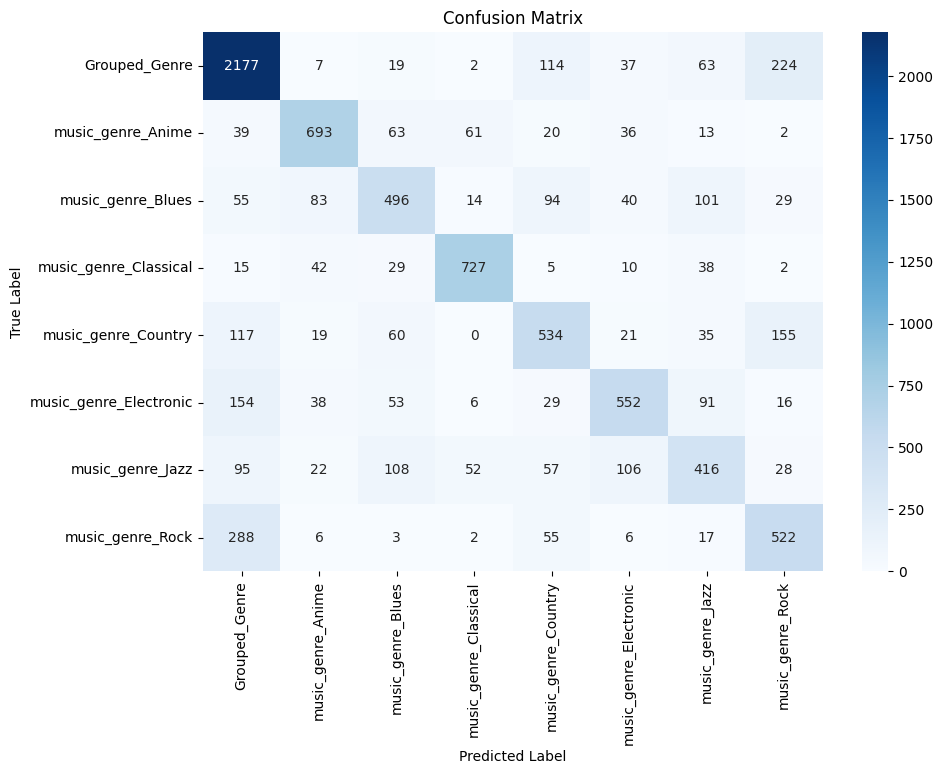

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's take the original dataset again because it was modified in the last script
df = pd.read_csv('dataset_preprocessed.csv')

# Group Alternative, Rap, Hip-Hop into a single genre, creating a new column for the target
df['Grouped_Genre'] = df[['music_genre_Alternative', 'music_genre_Rap', 'music_genre_Hip-Hop']].max(axis=1)

# Define the target (y) by combining the grouped genres with the other genres
y = df[['Grouped_Genre', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Rock',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Remove columns that are no longer needed from X (features)
X = df.drop(columns=[
    'Grouped_Genre', 'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz'
])

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with optimized parameters
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(C=10, gamma='auto', kernel='rbf', random_state=42))  # SVM model with RBF kernel and optimized parameters
])

# Train
pipeline_svm.fit(X_train, y_train)

# Test
y_pred = pipeline_svm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Show the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline_svm.classes_, yticklabels=pipeline_svm.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


And the second try will be to find the combination of the 2 genres that worst impact the accuracy of the model and delete them in order to have a simpler but way more accurate model. We are gonna use linear kernel to speed up the process considering we will have to create and evaluate various models

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's take the original dataset again because it was modified in the last script
df = pd.read_csv('dataset_preprocessed.csv')

# List of genres to consider
genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
          'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
          'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock']

# Function to train and evaluate the SVM model for a removed genre pair
def train_and_evaluate_svm(df_filtered, X_columns, y_column_names):
    # Separate features (X) and target variable (y)
    X_filtered = df_filtered.drop(columns=y_column_names)
    y_filtered = df_filtered[y_column_names].idxmax(axis=1)

    # Split the filtered dataset into training and test sets
    X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
        X_filtered, y_filtered, test_size=0.2, random_state=42
    )

    # Create the SVM pipeline (Standardization + Linear SVM)
    pipeline_svm = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('svm', SVC(kernel='linear', C=1, random_state=42))  # Linear SVM
    ])

    # Train the model
    pipeline_svm.fit(X_train_filtered, y_train_filtered)

    # Predictions on the test set
    y_pred_svm_filtered = pipeline_svm.predict(X_test_filtered)

    # Evaluate accuracy
    accuracy_svm_filtered = accuracy_score(y_test_filtered, y_pred_svm_filtered)
    return accuracy_svm_filtered

# Variables to track the best combination
best_accuracy = 0
best_combination = None

# Test all possible combinations of genre pairs
for genre_pair in itertools.combinations(genres, 2):
    print(f"Testing without genres: {genre_pair}")

    # Remove rows where both labels of the pair are True
    df_filtered = df[
        (df[genre_pair[0]] == False) &
        (df[genre_pair[1]] == False)
    ]

    # Updated list of target genres after removing genre columns
    y_column_names = [g for g in genres if g not in genre_pair]

    # Train and evaluate the model
    accuracy = train_and_evaluate_svm(df_filtered, X.columns, y_column_names)
    print(f"Accuracy without {genre_pair}: {accuracy:.4f}")

    # Update the best combination if this is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = genre_pair

# Show the combination with the best accuracy
print(f"\nBest combination to remove: {best_combination} with accuracy: {best_accuracy:.4f}")


Testing without genres: ('music_genre_Alternative', 'music_genre_Anime')
Accuracy without ('music_genre_Alternative', 'music_genre_Anime'): 0.5954
Testing without genres: ('music_genre_Alternative', 'music_genre_Blues')
Accuracy without ('music_genre_Alternative', 'music_genre_Blues'): 0.6312
Testing without genres: ('music_genre_Alternative', 'music_genre_Classical')
Accuracy without ('music_genre_Alternative', 'music_genre_Classical'): 0.5680
Testing without genres: ('music_genre_Alternative', 'music_genre_Country')
Accuracy without ('music_genre_Alternative', 'music_genre_Country'): 0.6029
Testing without genres: ('music_genre_Alternative', 'music_genre_Electronic')
Accuracy without ('music_genre_Alternative', 'music_genre_Electronic'): 0.6112
Testing without genres: ('music_genre_Alternative', 'music_genre_Hip-Hop')
Accuracy without ('music_genre_Alternative', 'music_genre_Hip-Hop'): 0.6471
Testing without genres: ('music_genre_Alternative', 'music_genre_Jazz')
Accuracy without ('m

**Best combination to remove: ('music_genre_Alternative', 'music_genre_Hip-Hop') with accuracy: 0.6471**




once we have found the best combination to remove we proceed to revaluate the model.
We are going to use the best parameter for the model that were shown in the grind search.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Read the uploaded CSV file
df = pd.read_csv('dataset_preprocessed.csv')

df_filtered = df[
    (df['music_genre_Alternative'] == False) &
    (df['music_genre_Hip-Hop'] == False)
]

# Separate features (X) and target variable (y)
X = df_filtered.drop(columns=[
    'music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
])

# Combine binary genre columns into a single target variable
y = df_filtered[[
    'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
]].idxmax(axis=1)

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters for the RBF SVM model
svm_model_rbf = SVC(kernel='rbf', C=10, gamma='scale', random_state=41)

# Pipeline: standardization + RBF SVM
pipeline_rbf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', svm_model_rbf)         # SVM model with RBF kernel
])

# Train the model
pipeline_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = pipeline_rbf.predict(X_test)

# Evaluate the model's performance
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
classification_rep_rbf = classification_report(y_test, y_pred_rbf)

# Show the results
print(f"Accuracy (RBF kernel): {accuracy_rbf}")
print(f"Classification Report:\n{classification_rep_rbf}")


Accuracy (kernel RBF): 0.6888611457899847
Classification Report:
                        precision    recall  f1-score   support

     music_genre_Anime       0.78      0.76      0.77       948
     music_genre_Blues       0.59      0.54      0.56       875
 music_genre_Classical       0.83      0.85      0.84       903
   music_genre_Country       0.60      0.61      0.61       853
music_genre_Electronic       0.69      0.63      0.66       903
      music_genre_Jazz       0.57      0.54      0.56       908
       music_genre_Rap       0.83      0.80      0.81       917
      music_genre_Rock       0.61      0.77      0.68       902

              accuracy                           0.69      7209
             macro avg       0.69      0.69      0.69      7209
          weighted avg       0.69      0.69      0.69      7209



As we can see, the results are improved by a significant factor.
The trade between precision and range of categorization is fair in this case in order to have a useful model in terms of accuracy and recall

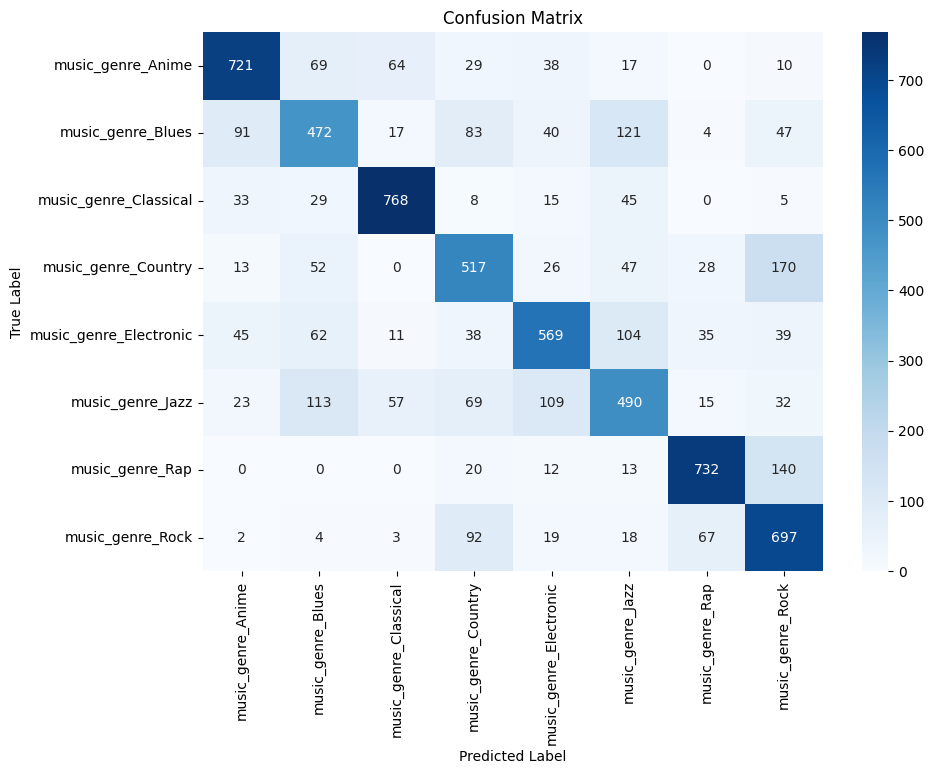

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrix using an heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline_rbf.classes_, yticklabels=pipeline_rbf.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
